In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('hyd_house.csv')

In [3]:
df.head()

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,NaN
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,...,1200,USER_DASHBOARD,15000,False,http://nobr.kr/sv/j2pD6,False,2,BHK3,BOREWELL,NaN
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,NaN,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,...,1800,MISSED_CALL,16000,False,http://nobr.kr/sv/TXJmj,False,3,BHK3,CORP_BORE,NaN
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,750,MISSED_CALL,9000,False,http://nobr.kr/sv/FnCsf,False,2,BHK2,CORP_BORE,NaN
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,NaN,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,...,1250,None,32500,False,http://nobr.kr/sv/BQFRb,False,5,BHK2,CORP_BORE,NaN


In [4]:
df.shape

(19110, 36)

In [5]:
df.columns

Index(['active', 'amenities', 'balconies', 'bathroom', 'combineDescription',
       'completeStreetName', 'deposit', 'facing', 'facingDesc', 'floor',
       'furnishingDesc', 'gym', 'id', 'isMaintenance', 'lift', 'loanAvailable',
       'locality', 'localityId', 'location', 'maintenanceAmount', 'ownerName',
       'parking', 'parkingDesc', 'propertyTitle', 'propertyType',
       'property_age', 'property_size', 'reactivationSource', 'rent_amount',
       'sharedAccomodation', 'shortUrl', 'swimmingPool', 'totalFloor',
       'type_bhk', 'waterSupply', 'weight'],
      dtype='object')

In [6]:
df1=df.drop(['amenities','locality','balconies','lift','active','loanAvailable','location','ownerName',
                          'parkingDesc','propertyTitle','propertyType','combineDescription','completeStreetName','facing',
                          'facingDesc','furnishingDesc','gym','id','isMaintenance','weight','waterSupply','swimmingPool',
                          'shortUrl','sharedAccomodation','reactivationSource'],axis=1)

In [7]:
print(df1.parking.value_counts())
print(df1.bathroom.value_counts())
print(df1.floor.value_counts())
print(df1.type_bhk.value_counts())
print(df1.maintenanceAmount.value_counts())

BOTH            9599
TWO_WHEELER     7430
FOUR_WHEELER    1131
NONE             950
Name: parking, dtype: int64
2     9852
1     5699
3     3265
4      207
5       54
6       17
7        9
8        3
12       3
14       1
Name: bathroom, dtype: int64
1     4735
2     4678
0     3908
3     2785
4     1424
5      830
6      157
7      113
8       80
9       66
11      54
10      39
12      38
14      35
13      28
18      21
16      18
15      17
20      13
19      13
17      10
21      10
23       9
25       6
24       6
22       6
28       4
29       3
26       2
30       1
31       1
Name: floor, dtype: int64
BHK2        9242
BHK3        4229
BHK1        4221
RK1         1149
BHK4         211
BHK4PLUS      58
Name: type_bhk, dtype: int64
None    9658
1000    1542
1500    1435
2000    1132
500     1069
        ... 
1416       1
1840       1
4830       1
875        1
6125       1
Name: maintenanceAmount, Length: 264, dtype: int64


## encoding data

In [8]:
df1.replace({'parking':{'NONE':0,'TWO_WHEELER':1,'FOUR_WHEELER':2,'BOTH':3}},inplace=True)
df1.replace({'type_bhk':{'RK1':0.5,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5}},inplace=True)
df1.replace({'maintenanceAmount':{'None':int(0)}},inplace=True)
df1["localityId"].replace("NOT_FOUND", "other",inplace=True)

In [9]:
df1.head()

,bathroom,deposit,floor,localityId,maintenanceAmount,parking,property_age,property_size,rent_amount,totalFloor,type_bhk
0,3,90000,3,gachibowli,2000,3,5,2200,28000,5,3.0
1,2,45000,2,chandrayangutta,0,1,1,1200,15000,2,3.0
2,3,80000,0,manikonda,1000,3,0,1800,16000,3,3.0
3,2,18000,2,other,500,3,0,750,9000,2,2.0
4,2,80000,2,hitech_city,2000,3,5,1250,32500,5,2.0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathroom           19110 non-null  int64  
 1   deposit            19110 non-null  int64  
 2   floor              19110 non-null  int64  
 3   localityId         19110 non-null  object 
 4   maintenanceAmount  19110 non-null  object 
 5   parking            19110 non-null  int64  
 6   property_age       19110 non-null  int64  
 7   property_size      19110 non-null  int64  
 8   rent_amount        19110 non-null  int64  
 9   totalFloor         19110 non-null  int64  
 10  type_bhk           19110 non-null  float64
dtypes: float64(1), int64(8), object(2)
memory usage: 1.6+ MB


In [11]:
df1.isnull().sum()

bathroom             0
deposit              0
floor                0
localityId           0
maintenanceAmount    0
parking              0
property_age         0
property_size        0
rent_amount          0
totalFloor           0
type_bhk             0
dtype: int64

In [12]:
df2=df1.copy()

In [13]:
df2['localityId'].value_counts()

other               3491
kondapur            1338
kukatpally          1146
miyapur              721
hafeezpet            663
                    ... 
chanchalguda           1
samshabad_colony       1
bahadurpura_west       1
vattepally             1
chudi_bazaar           1
Name: localityId, Length: 269, dtype: int64

In [14]:
df2['maintenance']=df2['maintenanceAmount'].apply(lambda x:int(x))

In [15]:
df2.head()

,bathroom,deposit,floor,localityId,maintenanceAmount,parking,property_age,property_size,rent_amount,totalFloor,type_bhk,maintenance
0,3,90000,3,gachibowli,2000,3,5,2200,28000,5,3.0,2000
1,2,45000,2,chandrayangutta,0,1,1,1200,15000,2,3.0,0
2,3,80000,0,manikonda,1000,3,0,1800,16000,3,3.0,1000
3,2,18000,2,other,500,3,0,750,9000,2,2.0,500
4,2,80000,2,hitech_city,2000,3,5,1250,32500,5,2.0,2000


In [16]:
df3=df2.drop(['maintenanceAmount','deposit','property_age','totalFloor'],axis=1)

In [17]:
df3.head()

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance
0,3,3,gachibowli,3,2200,28000,3.0,2000
1,2,2,chandrayangutta,1,1200,15000,3.0,0
2,3,0,manikonda,3,1800,16000,3.0,1000
3,2,2,other,3,750,9000,2.0,500
4,2,2,hitech_city,3,1250,32500,2.0,2000


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathroom       19110 non-null  int64  
 1   floor          19110 non-null  int64  
 2   localityId     19110 non-null  object 
 3   parking        19110 non-null  int64  
 4   property_size  19110 non-null  int64  
 5   rent_amount    19110 non-null  int64  
 6   type_bhk       19110 non-null  float64
 7   maintenance    19110 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.2+ MB


# Feature Engineering

In [20]:
df4=df3.copy()
df4['rent_per_sqft']=df4['rent_amount']/df4['property_size']
df4.head()

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance,rent_per_sqft
0,3,3,gachibowli,3,2200,28000,3.0,2000,12.727273
1,2,2,chandrayangutta,1,1200,15000,3.0,0,12.500000
2,3,0,manikonda,3,1800,16000,3.0,1000,8.888889
3,2,2,other,3,750,9000,2.0,500,12.000000
4,2,2,hitech_city,3,1250,32500,2.0,2000,26.000000


In [21]:
location_stats=df4.groupby('localityId')['localityId'].agg('count').sort_values(ascending=False)
location_stats

localityId
other                   3491
kondapur                1338
kukatpally              1146
miyapur                  721
hafeezpet                663
                        ... 
r_krishnaiah_nagar         1
samshabad_colony           1
komaram_bheem_colony       1
rakshapuram                1
karwan_east                1
Name: localityId, Length: 269, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

119

In [23]:
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10

localityId
bairagiguda             10
kanchan_bagh            10
koti                    10
auto_nagar              10
nampally                10
                        ..
r_krishnaiah_nagar       1
samshabad_colony         1
komaram_bheem_colony     1
rakshapuram              1
karwan_east              1
Name: localityId, Length: 119, dtype: int64

In [24]:
df4.localityId=df4.localityId.apply(lambda x:'other' if x  in location_less_than_10 else x)
df4['localityId'].value_counts()
location_less_than_10

localityId
bairagiguda             10
kanchan_bagh            10
koti                    10
auto_nagar              10
nampally                10
                        ..
r_krishnaiah_nagar       1
samshabad_colony         1
komaram_bheem_colony     1
rakshapuram              1
karwan_east              1
Name: localityId, Length: 119, dtype: int64

## outliner detection

In [25]:
df4[df4.property_size/df4.type_bhk<300]

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance,rent_per_sqft
582,1,0,serilingampally,1,100,5000,0.5,0,50.000000
647,1,1,miyapur,1,144,5500,0.5,0,38.194444
706,1,1,other,0,100,4000,0.5,0,40.000000
719,2,6,other,3,0,25000,2.0,2500,inf
734,1,1,other,3,120,10000,0.5,1000,83.333333
...,...,...,...,...,...,...,...,...,...
18845,1,5,hafeezpet,3,500,8000,2.0,720,16.000000
18846,1,0,padmarao_nagar,1,250,5000,1.0,500,20.000000
18937,1,2,ramachandra_puram,1,200,8000,1.0,0,40.000000
18977,2,1,nallagandla,3,400,15000,2.0,550,37.500000


In [26]:
df4.shape

(19110, 9)

In [27]:
df5=df4[~(df4.property_size/df4.type_bhk<300)]
df5.shape

(18761, 9)

In [28]:
df5.rent_per_sqft.describe()

count    18761.000000
mean        14.520746
std          6.085518
min          0.000000
25%         10.666667
50%         13.500000
75%         17.000000
max        120.000000
Name: rent_per_sqft, dtype: float64

In [30]:
def remove_pps_outliers (df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('localityId'):
        m=np.mean(subdf.rent_per_sqft)
        st=np.std(subdf.rent_per_sqft) 
        reduced_df=subdf[(subdf.rent_per_sqft>(m-st))&(subdf.rent_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6=remove_pps_outliers(df5)
df6.shape

(14819, 9)

In [31]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline


Text(0.5, 1.0, 'distribution of data')

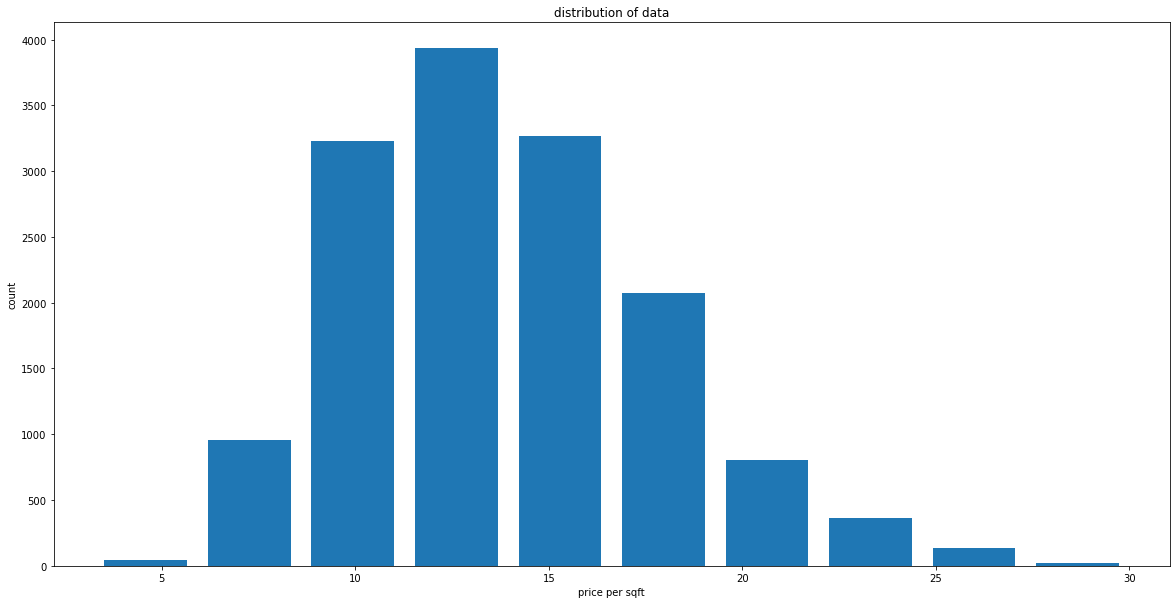

In [33]:
mpl.rcParams['figure.figsize']=(20,10)
plt.hist(df6.rent_per_sqft,rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.title('distribution of data')

In [34]:
df6.bathroom.unique()

array([2, 3, 1, 4, 5, 7, 6, 8], dtype=int64)

In [36]:
df6[df6.bathroom>df6.type_bhk+1]

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance,rent_per_sqft
1101,7,0,borabanda,1,3250,40000,5.0,0,12.307692
1212,7,0,east_marredpally,3,6000,65000,5.0,2500,10.833333
1252,2,3,erragadda,1,500,8000,0.5,0,16.000000
1602,8,0,gachibowli,3,4500,100000,5.0,0,22.222222
1736,6,0,gopanapalli,3,2250,32000,4.0,0,14.222222
2495,8,0,himayath_nagar,3,3000,60000,5.0,0,20.000000
2510,2,1,himayath_nagar,1,400,10000,0.5,0,25.000000
3300,6,0,jubilee_hills,3,3400,65000,4.0,5000,19.117647
3484,5,0,karkhana,3,3600,36000,3.0,0,10.000000
3601,2,0,kismatpur,1,300,3500,0.5,500,11.666667


In [38]:
df7=df6[df6.bathroom<=df6.type_bhk+1]

In [39]:
df7.shape

(14789, 9)

In [40]:
df8=df7.drop('rent_per_sqft',axis=1)
df8.head()

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance
0,2,2,adikmet,1,900,10000,2.0,0
1,3,0,adikmet,3,1780,30000,3.0,3560
2,2,2,adikmet,1,680,10000,2.0,0
3,2,3,adikmet,1,1050,12000,2.0,1200
4,1,2,adikmet,1,600,9500,2.0,0


## one hot encoding

In [41]:
dummies=pd.get_dummies(df8.localityId)
dummies.head()

,adikmet,almasguda,amberpet,ameerpet,attapur,badangpet,badesahebguda,balakampet,balanagar,balapur,...,turkayamjal,uppal,upparpally,venkat_nagar_colony,west_marredpally,whisper_valley,yapral,yella_reddy_guda,yousufguda,zamistanpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df9=pd.concat([df8.drop('localityId',axis='columns'),dummies.drop('other',axis='columns')],axis='columns')
df9.head()

,bathroom,floor,parking,property_size,rent_amount,type_bhk,maintenance,adikmet,almasguda,amberpet,...,turkayamjal,uppal,upparpally,venkat_nagar_colony,west_marredpally,whisper_valley,yapral,yella_reddy_guda,yousufguda,zamistanpur
0,2,2,1,900,10000,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,3,1780,30000,3.0,3560,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,680,10000,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,1,1050,12000,2.0,1200,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,1,600,9500,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df9.shape

(14789, 156)

In [44]:
X=df9.drop('rent_amount',axis='columns')
X

,bathroom,floor,parking,property_size,type_bhk,maintenance,adikmet,almasguda,amberpet,ameerpet,...,turkayamjal,uppal,upparpally,venkat_nagar_colony,west_marredpally,whisper_valley,yapral,yella_reddy_guda,yousufguda,zamistanpur
0,2,2,1,900,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,3,1780,3.0,3560,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,680,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,1,1050,2.0,1200,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,1,600,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14814,2,1,3,500,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14815,2,4,3,1000,2.0,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14816,1,2,3,720,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14817,1,2,3,500,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
Y=df9['rent_amount']
Y

0        10000
1        30000
2        10000
3        12000
4         9500
         ...  
14814     8000
14815    12000
14816     9000
14817     6000
14818    16000
Name: rent_amount, Length: 14789, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.8658779064452148

In [48]:
y_pred = lr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score

r2_score(Y_test, y_pred)

0.8658779064452148

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score 

cv = ShuffleSplit (n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression (),X,Y,cv=cv)

array([0.85875767, 0.85795135, 0.85678434, 0.85478097, 0.86573126])

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [52]:
y_pred = rf.predict(X_test)

In [53]:
from sklearn.metrics import r2_score

r2_score(Y_test, y_pred)

0.8537297232690542

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score 

cv = ShuffleSplit (n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestRegressor (),X,Y,cv=cv)

array([0.84157699, 0.8494487 , 0.85273248, 0.85206146, 0.85231758])

In [55]:
X.columns

Index(['bathroom', 'floor', 'parking', 'property_size', 'type_bhk',
       'maintenance', 'adikmet', 'almasguda', 'amberpet', 'ameerpet',
       ...
       'turkayamjal', 'uppal', 'upparpally', 'venkat_nagar_colony',
       'west_marredpally', 'whisper_valley', 'yapral', 'yella_reddy_guda',
       'yousufguda', 'zamistanpur'],
      dtype='object', length=155)

In [56]:
def predict_rent(localityId,bathroom,floor,parking,property_size,type_bhk,maintenance):

    loc_index = np.where(X.columns==localityId)[0][0] 
    x= np.zeros(len(X.columns))
    x[0]=bathroom
    x[1]=floor
    x[2]=parking
    x[3]=property_size
    x[4]=type_bhk
    x[5]=maintenance
    
    if loc_index>=0:
        x[loc_index]=1 

    return lr.predict([x])[0]



In [57]:
predict_rent('yousufguda',4,2,2,1000,3,1000)

17407.043508352115

In [ ]:
import pickle
with open('rent_prediction.pickle','wb') as f:
    pickle.dump(lr,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))